In [79]:
import pandas as pd
import glob
# the input file is created from the Garmin fit file using the following command:
#java -jar FitSDKRelease_21.141.00/java/FitCSVTool.jar  FitDataDir/2024-08-10/16724880599_ACTIVITY.fit 

file_name=glob.glob('16*.csv')[0]


In [81]:
garmin_data=pd.read_csv(file_name)
# select rows with activity Message == record or lap
garmin_data_1=garmin_data[(garmin_data['Message']=='record') | (garmin_data['Message']=='lap')]


# select columns with the following names ['Message','Field 1', 'Value 1', 'Field 2', 'Value 2', 'Field 3', 'Value 3']
garmin_data_1=garmin_data_1[['Message','Field 1', 'Value 1', 'Field 2', 'Value 2', 'Field 3', 'Value 3','Field 4','Value 4','Field 5','Value 5','Field 6','Value 6','Field 9','Value 9']]
print(garmin_data_1.head(5))

# save the data to a new csv file
import datetime
time_stamp=garmin_data_1['Value 1'].iloc[1]
time_stamp=int(time_stamp)
cdate=datetime.datetime(1989,12,31)+datetime.timedelta(seconds=time_stamp)
garmin_data_1.to_csv('garmin_data_%s.csv'%str(cdate),index=False)


   Message    Field 1     Value 1       Field 2    Value 2        Field 3  \
42  record  timestamp           1  position_lat          1  position_long   
43  record  timestamp  1092223151  position_lat  468103672  position_long   
50  record  timestamp  1092223154  position_lat  468103255  position_long   
52  record  timestamp  1092223155  position_lat  468103025  position_long   
55  record  timestamp  1092223156  position_lat  468102780  position_long   

        Value 3   Field 4  Value 4         Field 5 Value 5            Field 6  \
42          1.0  distance     1.00  enhanced_speed       1  enhanced_altitude   
43 -916484792.0  distance     2.25  enhanced_speed   2.463  enhanced_altitude   
50 -916485512.0  distance     9.35  enhanced_speed   2.809  enhanced_altitude   
52 -916485564.0  distance    12.18  enhanced_speed   2.827  enhanced_altitude   
55 -916485534.0  distance    12.18  enhanced_speed   2.827  enhanced_altitude   

    Value 6  Field 9  Value 9  
42      1.0  caden

/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_82405/3256313476.py:1: DtypeWarning: Columns (31,38,41,44,46,53,65,68,74,85,95,111,113,114,117,119,120,122,123,125,126,127,129,132,135,138,141,144,147,150,153,156,159,162,165,168,171,174,177,180,183,186,189,192,195,198,201,204,207,210,213,216,219,222,225,228,231,234,237,240,243,246,249,252,255,258,261,264,267,270,273,276,279,282,285,288,291,294,297,300,303,306,309,312) have mixed types. Specify dtype option on import or set low_memory=False.
  garmin_data=pd.read_csv(file_name)


1092223722
[1, 1092223723, 1092223750]


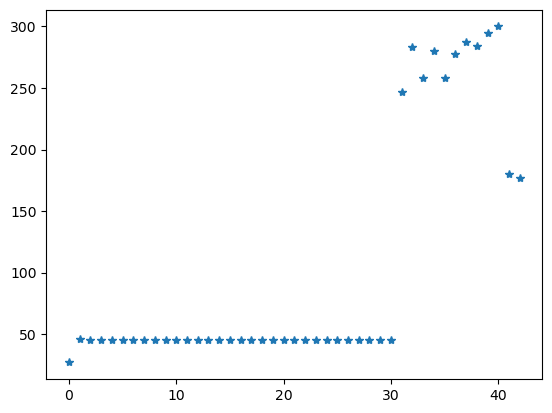

In [82]:
# select rows with activity Message ==  lap
garmin_data_2=garmin_data_1[garmin_data_1['Message']=='lap']
n_records=garmin_data_2.shape[0]
timeL=[]
for i in range(n_records):
    #get time stamp
    time_stamp=garmin_data_2['Value 1'].iloc[i]
    time_stamp=int(time_stamp)
    timeL.append(time_stamp)
dtL=[]
for i in range(n_records-1):
    dt=timeL[i+1]-timeL[i]
    dtL.append(dt)

import matplotlib.pyplot as plt
plt.plot(dtL[1:],'*')
print(dtL[0])
print(timeL[:3])

In [87]:
# select rows Field 2==position_lat
import cartopy.crs as ccrs
lonL,latL=[],[]
speedL=[]
distL=[]
for i in range(garmin_data_1.shape[0]):
    if garmin_data_1['Field 2'].iloc[i]=='position_lat' and garmin_data_1['Field 3'].iloc[i]=='position_long':
        lat1=float(garmin_data_1['Value 2'].iloc[i])
        lon1=float(garmin_data_1['Value 3'].iloc[i])
        dist1=float(garmin_data_1['Value 4'].iloc[i])
        speed=float(garmin_data_1['Value 5'].iloc[i])
        
        if abs(lon1)>1 and abs(lat1)>1:
            lonL.append(lon1/2**31*180.)
            latL.append(lat1/2**31*180.)
            distL.append(dist1)
            speedL.append(speed)

# create two subplots with ccrs projection


0.9528559947395239
7.368167641325536 7.395062378167648


(array([  0.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   2.,   9.,   8.,
          4.,   8.,   4.,   1.,   1.,   5.,   5.,   7.,   5.,  11.,  19.,
         49., 113., 359., 172., 113.,  33.,  32.,  22.,   4.,   7.,   8.,
          6.,   1.,   1.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.]),
 array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
       

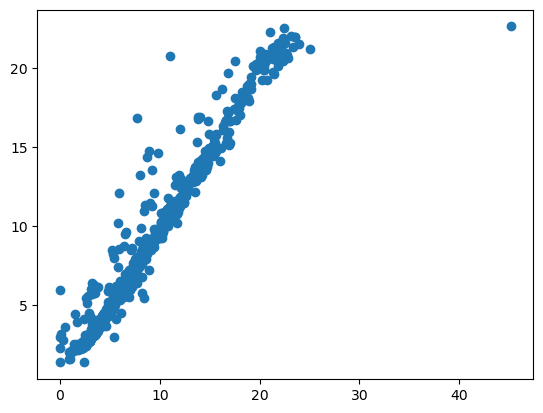

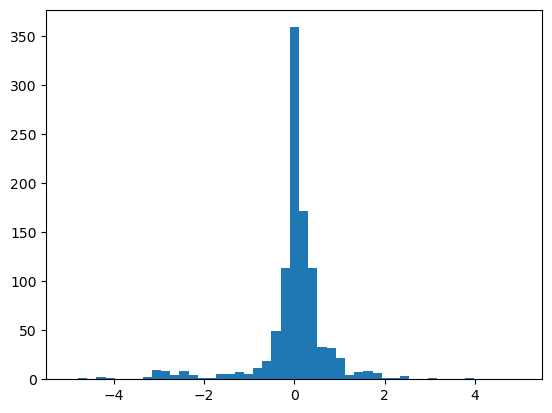

In [97]:
xL,yL=[],[]
for i in range(1,len(lonL)):
    #plt.plot(lonL[i-1:i+1],latL[i-1:i+1],'r')
    dlon=lonL[i]-lonL[i-1]
    dlat=latL[i]-latL[i-1]
    xL.append([abs(dlon),abs(dlat)])
    yL.append(distL[i]-distL[i-1])

xL=np.array(xL)
yL=np.array(yL)
x_mean=np.mean(xL,axis=0)
x_std=np.std(xL,axis=0)
x_scaled=(xL-x_mean)/x_std

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, yL, test_size=0.33, random_state=42)
nL=len(lonL)
nL2=int(nL/2)-100
X_train, X_test, y_train, y_test = x_scaled[:nL2], x_scaled[nL2:], yL[:nL2], yL[nL2:]
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)

y_pred=neigh.predict(X_test)
print(neigh.score(X_test,y_test))
plt.scatter(y_test,y_pred)
print(y_test.mean(),y_pred.mean())
plt.figure()
plt.hist(y_test-y_pred,bins=np.linspace(-5,5,50))

-76.8353483453393 -76.81330125778913 39.18250992894173 39.23599652945995


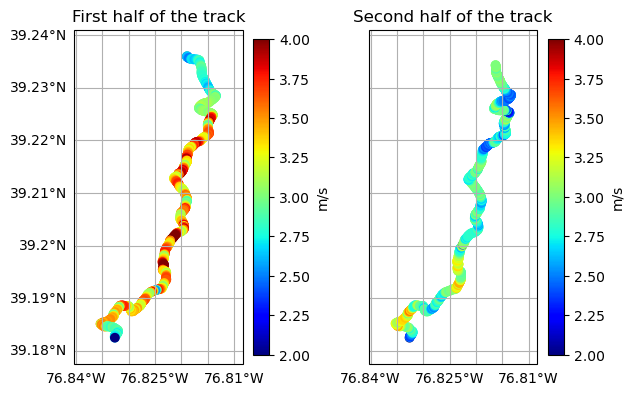

In [86]:

fig, ax = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()})
#ax = plt.axes(projection=ccrs.PlateCarree())
nL=len(lonL)
nL2=int(nL/2)-100
import numpy as np
img1=ax[0].scatter(lonL[:nL2],latL[:nL2],c=speedL[:nL2],cmap='jet',vmin=2,vmax=4)
gls=ax[0].gridlines(draw_labels=True)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
plt.colorbar(img1,label='m/s',shrink=0.75)
ax[0].set_title('First half of the track')
#ax[0].set_extent([np.min(lonL),np.max(lonL),np.min(latL),np.max(latL)])
ax[0].set_extent([-0.005+np.min(lonL),np.max(lonL)+0.005,-0.005+np.min(latL),0.005+np.max(latL)])
img2=ax[1].scatter(lonL[nL2:],latL[nL2:],c=speedL[nL2:],cmap='jet',vmin=2,vmax=4)
plt.colorbar(img2,label='m/s',shrink=0.75)
ax[1].set_title('Second half of the track')
gls=ax[1].gridlines(draw_labels=True)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
gls.left_labels=False # suppress left labels
ax[1].set_extent([-0.005+np.min(lonL),np.max(lonL)+0.005,-0.005+np.min(latL),0.005+np.max(latL)])
print(np.min(lonL),np.max(lonL),np.min(latL),np.max(latL))
plt.tight_layout()